<a href="https://colab.research.google.com/github/Erika2397/Data_Visualization_Seaborn/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando base de dados**

In [119]:
# Importando biblioteca pandas
import pandas as pd

In [120]:
dados = pd.read_csv('https://raw.githubusercontent.com/Erika2397/Data_Visualization_Seaborn/main/tips.csv')

In [121]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **Tradução**

In [122]:
# Olhando os nomes da nossa coluna
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [123]:
# Criando uma variavel para trocar os nomes
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [124]:
# Adicionando nossas intruções para nossa nova variavel gorjeta
gorjetas = dados.rename(columns=renomear)

In [125]:
# Olhando nosso DataFrame
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [126]:
# Vendo os valores para traduxir dentro da coluna sobremesa
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [127]:
# Renomeando
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [128]:
# Mapeando na coluna sobremesa 
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [129]:
# Atribuindo as instruções na coluna sobremesa do nosso dataframe gorjetas
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [130]:
# Fazendo a mesma metodologia para os dias da semana do nosso dataframe
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [131]:
# Criando um dicionário para renomear dias da semana 
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [132]:
# Mapeando na coluna dias da semana
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [133]:
# Verificando nosso DataFrame
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3


In [134]:
# Fazendo a mesma metologia para hora do dia do nosso DataFrame
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [135]:
# Criando um dicionário para renomear hora do dia
hora = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [136]:
# Mapenado na coluna de hora do dia
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [137]:
# Verificando nosso DataFrame
gorjetas.head(244)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# **Importando o Seaborn**

In [138]:
!pip install seaborn==0.11.0

In [139]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: missingno


In [140]:
# Importando biblioteca seaborn
import seaborn as sns

# **Análise 1 - Valor da conta e gorjeta**

In [141]:
# Olhando as colunas do DataFrame
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

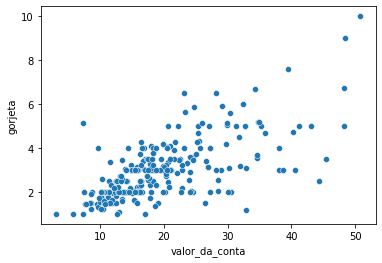

In [142]:
# Plotando o gráfico scatterplot
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Segundo o gráfico, o valor da gorjeta aumenta conforme o valor da conta aumenta**

In [143]:
print('A base de dados contém {} registros \n '.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 
 
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## **Criando o campo em porcentagens**

In [144]:
# Olhando o DataFrame
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3


In [145]:
# Criando a coluna de porcentagem
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [146]:
# Verificando o DataFrame
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


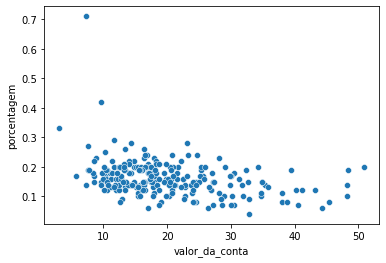

In [147]:
# Plotando o gráfico
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

*Inserindo subtítulo*

In [148]:
porcentagem_conta

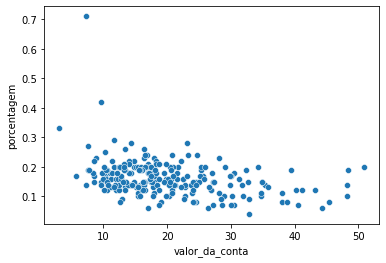

In [149]:
porcentagem_conta.get_figure()

In [150]:
porcentagem_conta.figure.suptitle('Valor da Conta x Proporcional de gorjeta')

Text(0.5, 0.98, 'Valor da Conta x Proporcional de gorjeta')

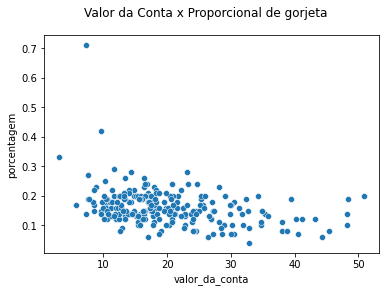

In [151]:
porcentagem_conta.get_figure()

*Inserindo Título*

In [152]:
porcentagem_conta.set_title('Valor proporcional da gorjeta de acordo ao valor total da conta')

Text(0.5, 1.0, 'Valor proporcional da gorjeta de acordo ao valor total da conta')

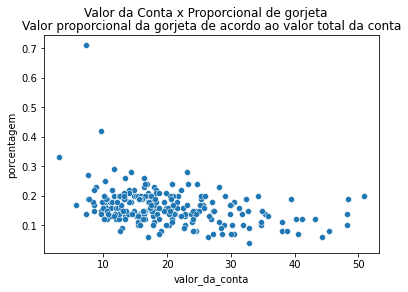

In [153]:
porcentagem_conta.get_figure()

*Mudando nomes dos eixos*

In [154]:
porcentagem_conta.set(xlabel='Valor da conta', ylabel='Gorjeta (%)')

[Text(17.200000000000003, 0.5, 'Gorjeta (%)'),
 Text(0.5, 18.106250000000003, 'Valor da conta')]

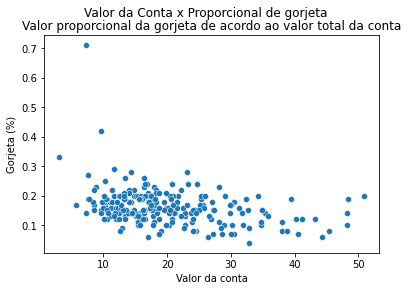

In [155]:
porcentagem_conta.get_figure()

**Visualmente, através do gráfico podemos observar que o valor da conta não é proporcional ao valor da gorjeta**

## **Gráficos Relplot e lmplot**

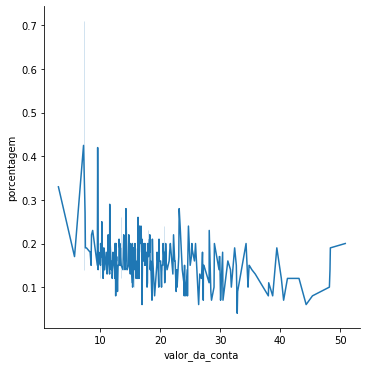

In [156]:
# Usando Relplot
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

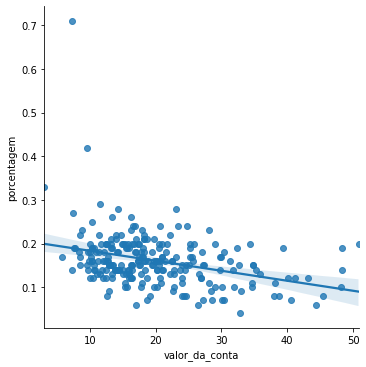

In [157]:
# Usando lmplot
porcentagem_conta_lmplot = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# **Análise 2 - Sobremesa**

In [158]:
# Olhando o DataFrame
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [159]:
# Vendo quantas pessoas pediram sobremesa / Análise descritiva
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [160]:
# Vendo quantas pessoas não pediram sobremesa / Análise descritiva
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


## **Gráfico por categorias**

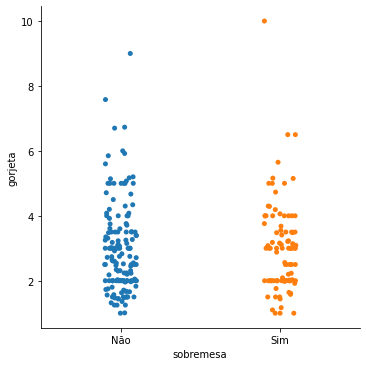

In [161]:
# Plotando com catplot
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

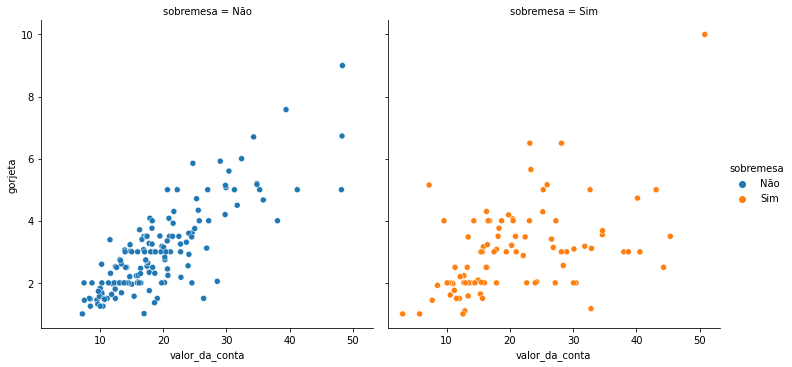

In [162]:
# Usando relplot
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

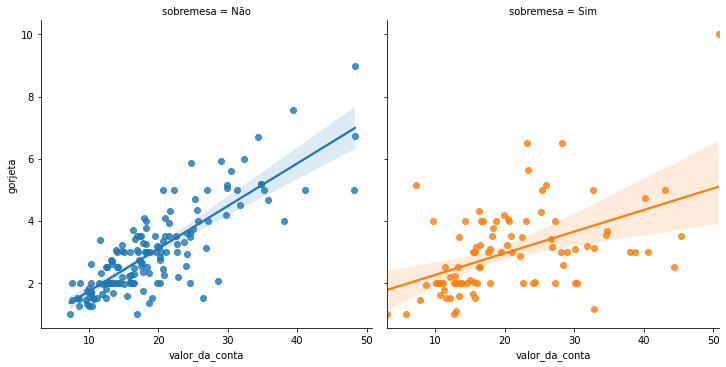

In [163]:
# Usando lmplot
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

Olhando a proporção de gorjeta por valor da conta:

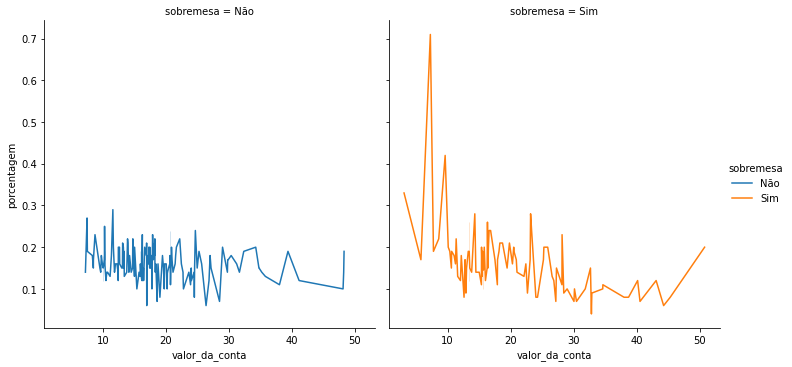

In [164]:
# Usando relplot: linha
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

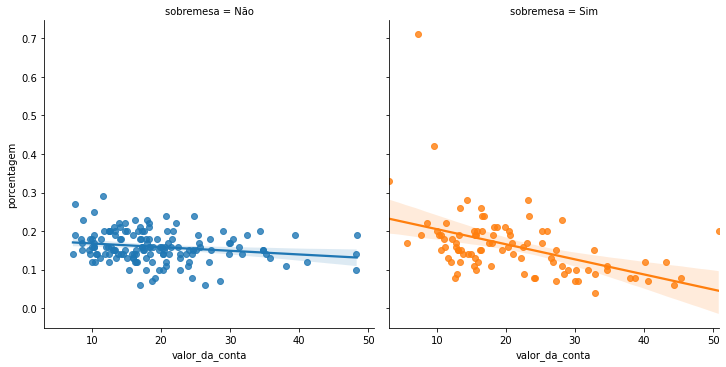

In [165]:
# Usando lmplot
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta de acordo com o pedido ou não de sobremesa, mas é bastante sutil**

## Teste de hipóteses

**H<sup>null</sup>** 

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>** 

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [166]:
# Importando biblioteca stats
from scipy.stats import ranksums

In [167]:
# Usando uma query para ver as porcentagens de pessoas que pediram sobremesas
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [168]:
# Usando uma query para ver as porcentagens de pessoas que pediram sobremesas
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [169]:
# Usando ranksums
r = ranksums(sobremesa, sem_sobremesa)

In [170]:
print('O valor do p-value é {} '.format(r.pvalue))

O valor do p-value é 0.5266635660124415 


**H<sup>null</sup>** 

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# **Análise 3 - Dia da semana**

In [171]:
# Vendo os 5 primeiros dados do DataFrame
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [172]:
# Visualizando os dias da semana
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

## Gráfico: Plot categórico

Visualizando se existe uma diferença na gorjeta no total da conta nos dias da semana:

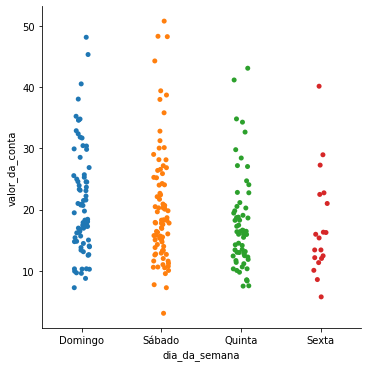

In [173]:
# Usando catplot
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

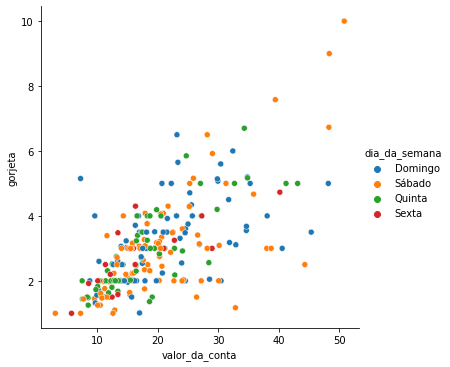

In [174]:
# Visualizando a distribuição de todos os dias da semana - Relplot
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

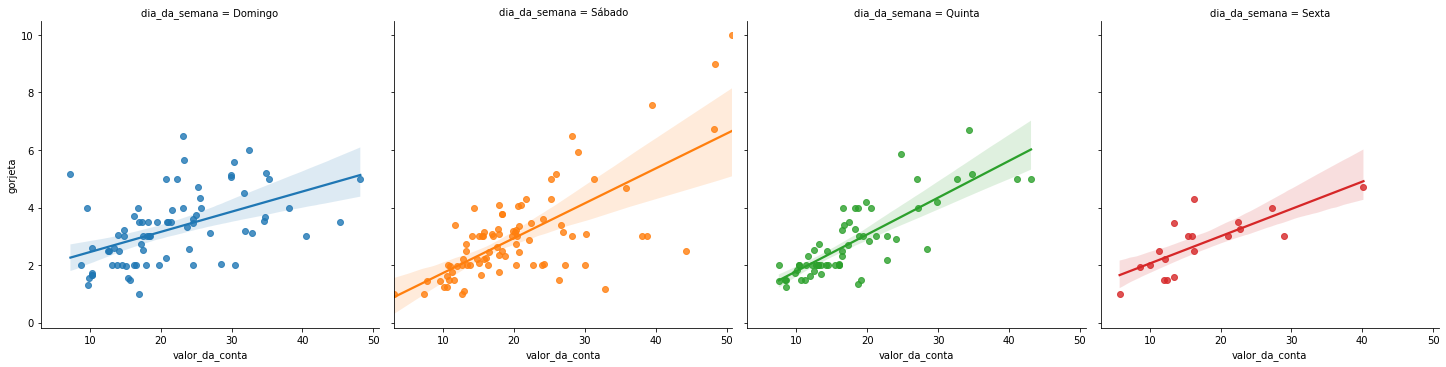

In [175]:
# Visualizando de forma separada os dias da semana para uma melhor interpretação
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Visualizando se existe uma diferença na proporção da gorjeta do valor total da conta nos dias da semana:

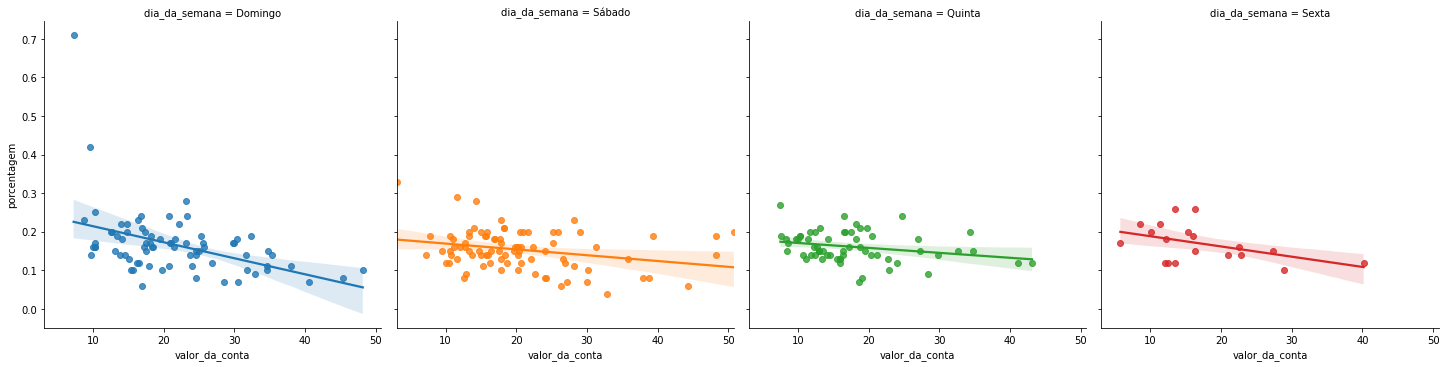

In [176]:
# Visualizando a proporção da gorjeta 
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

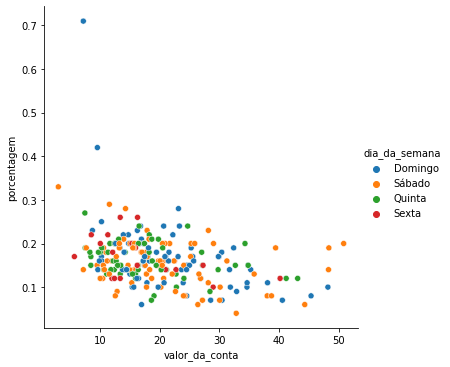

In [177]:
# Visualizando a proporção da gorjeta de todos os dias da semana - Relplot
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

## Análise descritiva

In [178]:
# Criando uma variavel para a média geral de gorjetas
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [179]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [180]:
# Agrupando as médias por dia da semana
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [181]:
# Vendo a frequencia que as pessoas vão no restaurante por dia da semana
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>** 

> **A distribuição do valor da conta é a mesma nos dois grupos**

**H<sup>alt</sup>** 

> **A distribuição do valor da conta não é a mesma nos dois grupos**

In [182]:
# Usando query para ver o valor da conta de acordo ao dia sábado
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [183]:
# Usando query para ver o valor da conta de acordo ao dia domingo
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [184]:
# Usando ranksums
r2 = ranksums(valor_conta_sabado, valor_conta_domingo)

In [185]:
r2

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

In [186]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>** 

> **A distribuição do valor da conta é a mesma nos dois grupos**

# **Análise 4 - Hora do dia**

In [187]:
# Vendo os primeiros dados do DataFrame
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [188]:
# Visualizando que hora do dia fazem pedido
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

## Gráficos - Distplot, Boxplot, Violinplot

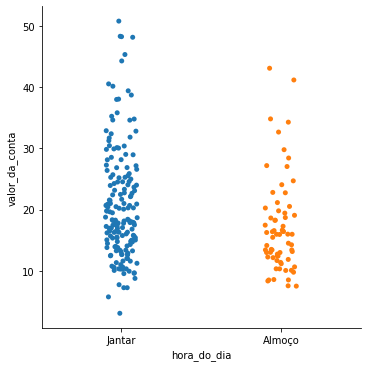

In [189]:
# Usando catplot
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

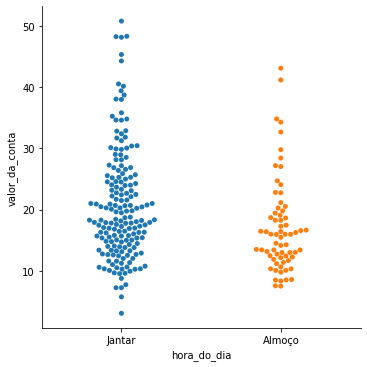

In [190]:
# Entendendo melhor a distribuição dos pontos - swarm
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

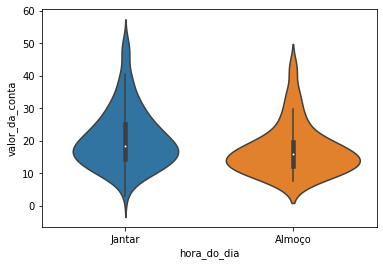

In [191]:
# Usando violinplot
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

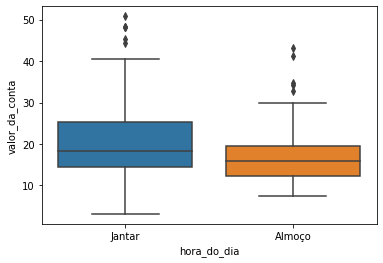

In [192]:
# Usando boxplot
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [193]:
# Criando uma variavel para visualizar quanto é o valor da conta no horário do almoço
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

In [194]:
# Criando uma variavel para visualizar quanto é o valor da conta no horário do jantar
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

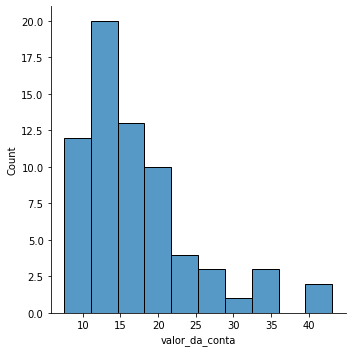

In [195]:
# Visualizando distplot histograma - Almoço
sns.displot(almoco)

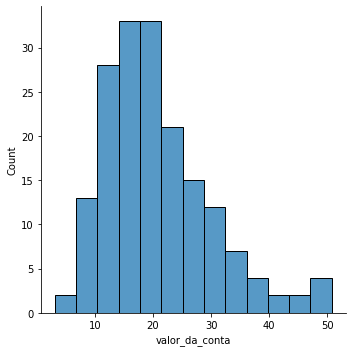

In [196]:
# Visualizando distplot histograma - Jantar
sns.displot(jantar)

## Teste de hipótese

In [197]:
# Agrupando por hora do dia com valor da conta
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**H<sup>null</sup>** 

> **A distribuição do valor da conta é a mesma no jantar e no almoço**

**H<sup>alt</sup>** 

> **A distribuição do valor da conta não é a mesma no jantar e no almoço**

In [198]:
# Usando raknsums
r3 = ranksums(jantar, almoco)

In [199]:
r3

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [200]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>** 

> **A distribuição do valor da conta não é a mesma no jantar e no almoço**

## Teste de hipótese II

**H<sup>null</sup>** 

> **A distribuição da taxa da gorjeta é a mesma no jantar e no almoço**

**H<sup>alt</sup>** 

> **A distribuição da taxa da gorjeta não é a mesma no jantar e no almoço**

In [201]:
# Vendo a proporção por hora do dia (Almoço)
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [202]:
# Vendo a proporção por hora do dia (Jantar)
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [204]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [205]:
print('O valor do p-value {}'.format(r4.pvalue))

O valor do p-value 0.2602493995587126


**H<sup>null</sup>** 

> **A distribuição da taxa da gorjeta é a mesma no jantar e no almoço**